First we upload the two dataset of the sign mnist


In [2]:
import pandas as pd
from scipy.stats import skew


# Load the dataset
dataset = pd.read_csv('sign_mnist_train.csv')
dataset.info()
print("Number of samples:", dataset.shape[0])
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
Number of samples: 27455


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
# Count the number of images per class
class_counts = dataset['label'].value_counts().sort_index()


# Compute the skew

skew2 = 3*(class_counts.mean() - class_counts.median()) / class_counts.std()
skew = class_counts.std() / class_counts.mean()
print(f"Number of classes: {len(class_counts)}")
print(f"Class distribution:\n{class_counts}")
print(f"Skew:{skew2} and {skew}")


# asymmetry of the distribution, (mean - median) / standard deviation

# dispersion of the data relative to the mean, standard deviation / mean

Number of classes: 24
Class distribution:
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64
Skew:-0.43129847690785494 and 0.0732183141355446


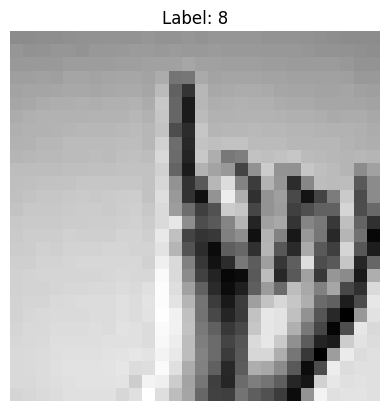

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(dataset, index):
    image = dataset.iloc[index, 1:].values.reshape(28, 28)
    label = dataset.iloc[index, 0]

    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Usage example:
show_image(dataset, 6)

The best ML model to classify these image should be the random forest deicsion tree or the KNN

K Nearest Neighbors (KNN): KNN is a simple and intuitive classification algorithm that assigns labels to data points based on the labels of their nearest neighbors in the feature space. KNN can be a reasonable choice for this task, as it can capture local patterns in the image data. However, KNN might not scale well to large datasets and can be sensitive to irrelevant features. Given the size of the Sign Language MNIST dataset, KNN can be a viable option to consider.


1. Data cleaning and preprocessing;
2. select a dataset;
3. split into train and test;
4. fit a Sklearn model on the training data;
5. test the accuracy of the learned model on the test data.

Mean accuracy: 0.9934885774197109
KNN F1 score:99.34885774197109


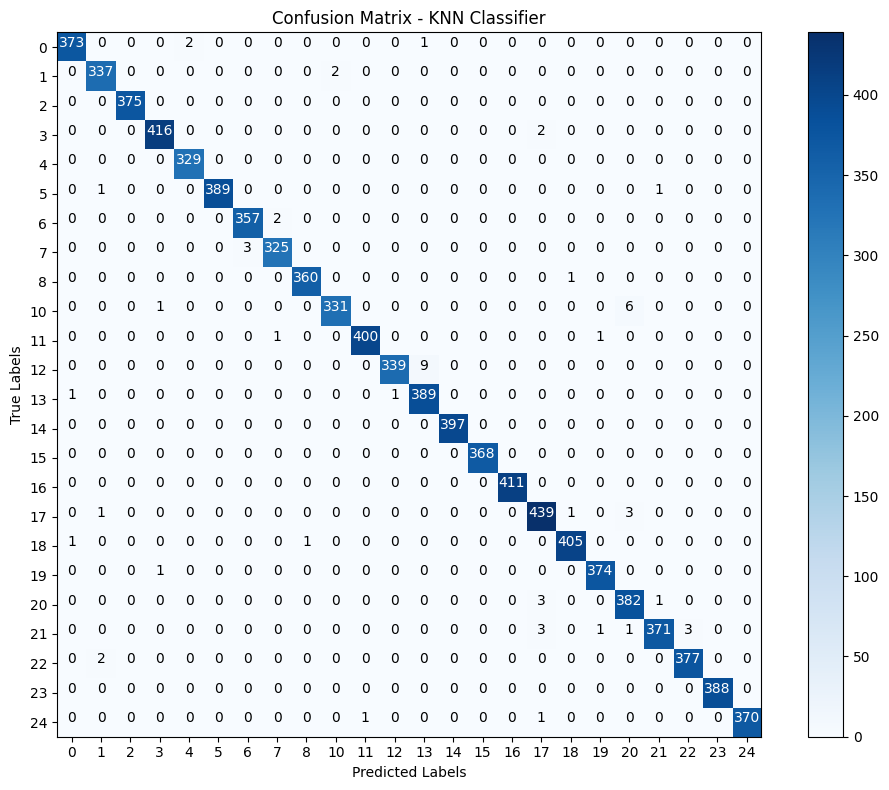

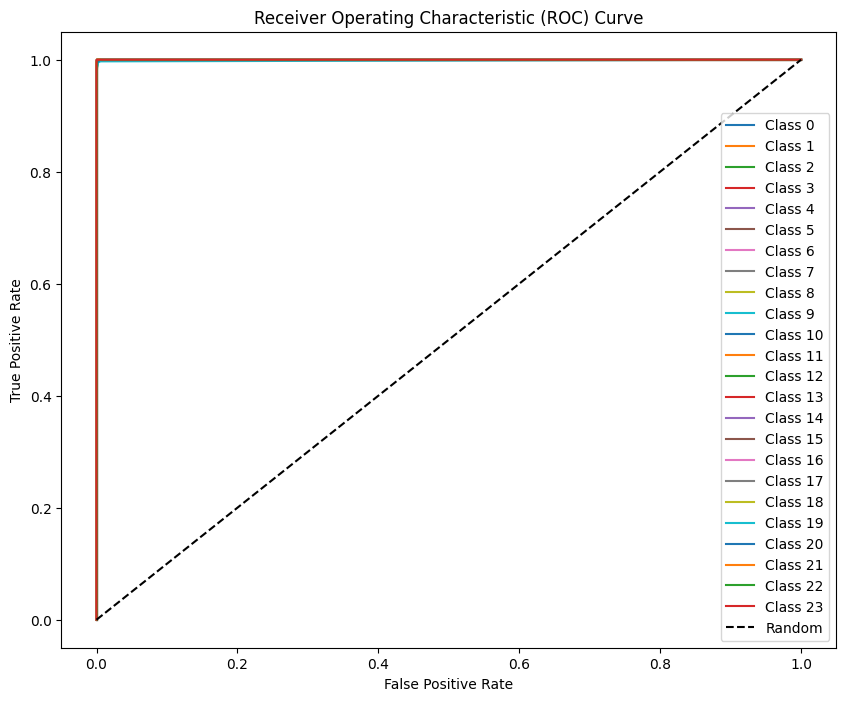

Class 0 ROC AUC: 0.9999969377380908
Class 1 ROC AUC: 0.9999940813553222
Class 2 ROC AUC: 1.0
Class 3 ROC AUC: 0.9999922497227891
Class 4 ROC AUC: 0.9999982595546966
Class 5 ROC AUC: 1.0
Class 6 ROC AUC: 0.999992957787055
Class 7 ROC AUC: 0.999989003024692
Class 8 ROC AUC: 0.9999974527971471
Class 9 ROC AUC: 0.9984974769143942
Class 10 ROC AUC: 0.9999979890362255
Class 11 ROC AUC: 0.9999722966474986
Class 12 ROC AUC: 0.9999712386835282
Class 13 ROC AUC: 1.0
Class 14 ROC AUC: 1.0
Class 15 ROC AUC: 1.0
Class 16 ROC AUC: 0.9999754309258777
Class 17 ROC AUC: 0.999995741271452
Class 18 ROC AUC: 0.999995701895771
Class 19 ROC AUC: 0.999955353809858
Class 20 ROC AUC: 0.9999729522580002
Class 21 ROC AUC: 0.9999858683145731
Class 22 ROC AUC: 1.0
Class 23 ROC AUC: 0.9999993812470841
Micro-average ROC AUC: 0.9999373033849072


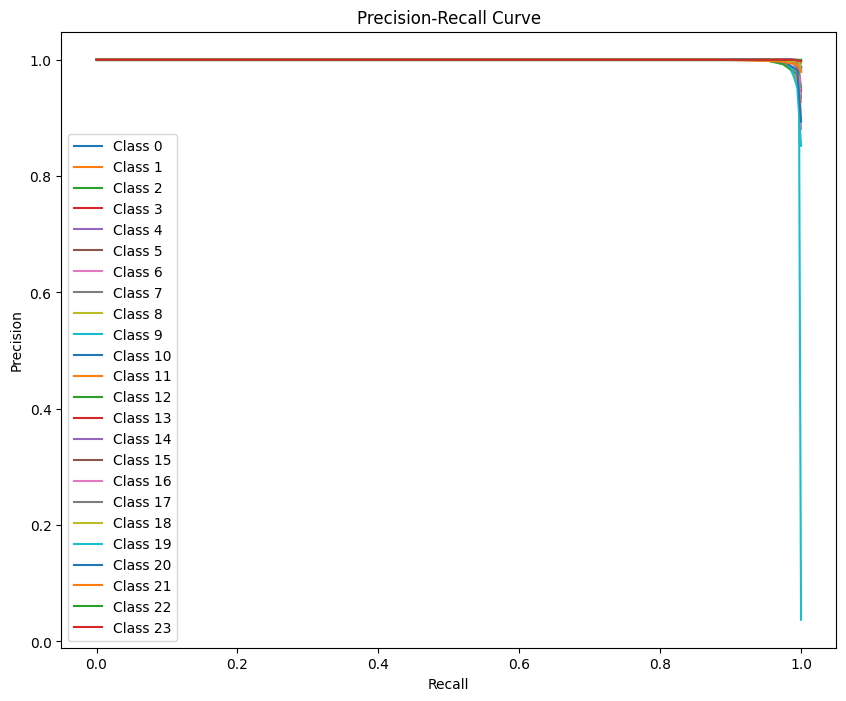

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split, StratifiedKFold


# Load the dataset
dataset = pd.read_csv('sign_mnist_train.csv')

# Split train and test
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Data cleaning
# Use it before the split
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN classifier
KNN = KNeighborsClassifier()  # KNeighborsClassifier(n_neighbors=3, p=2) whatas the difference? TODO

# Fit the model to the training data
KNN.fit(X_train_scaled, y_train)

# Prediction
y_pred = KNN.predict(X_test_scaled)

print("Mean accuracy:", KNN.score(X_test_scaled, y_test))

# Evaluate the result
print(f"KNN F1 score:{100*accuracy_score(y_test, y_pred)}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix (it is the same as using the heatmap method of the seaborn library)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - KNN Classifier')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add labels to each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

# get scores and binarize labels
y_prob = KNN.predict_proba(X_test_scaled)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# plot roc curves
plt.figure(figsize=(10, 8))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(), y_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Print ROC AUC values for each class
for i in range(len(np.unique(y_test))):
    print(f"Class {i} ROC AUC: {roc_auc[i]}")

print(f"Micro-average ROC AUC: {roc_auc_micro}")

# plot precision/recall curve
plt.figure(figsize=(10, 8))
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Text(0, 0.5, 'Accuracy')

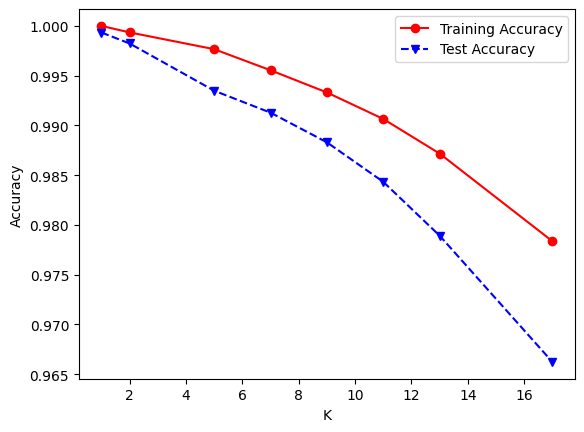

In [6]:
# Hyperparameters
hyperparameters = [1, 2, 5, 7, 9 ,11, 13, 17]

trainAcc = np.zeros(len(hyperparameters))
testAcc = np.zeros(len(hyperparameters))


# Plotting
for index, k in enumerate(hyperparameters):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN = KNN.fit(X_train_scaled, y_train)
    y_predTrain = KNN.predict(X_train_scaled)
    y_predTest = KNN.predict(X_test_scaled)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    
plt.plot(hyperparameters, trainAcc,'ro-', hyperparameters, testAcc, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('K')
plt.ylabel('Accuracy')

Mean accuracy: 0.9997792738108376
SVM F1 score:99.97792738108376


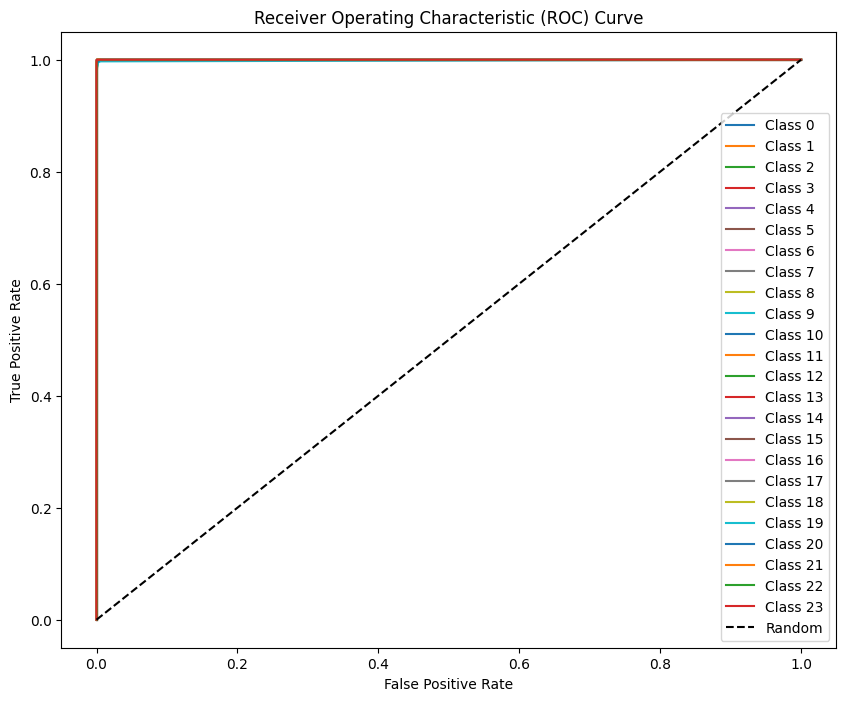

Class 0 ROC AUC: 0.9999969377380908
Class 1 ROC AUC: 0.9999940813553222
Class 2 ROC AUC: 1.0
Class 3 ROC AUC: 0.9999922497227891
Class 4 ROC AUC: 0.9999982595546966
Class 5 ROC AUC: 1.0
Class 6 ROC AUC: 0.999992957787055
Class 7 ROC AUC: 0.999989003024692
Class 8 ROC AUC: 0.9999974527971471
Class 9 ROC AUC: 0.9984974769143942
Class 10 ROC AUC: 0.9999979890362255
Class 11 ROC AUC: 0.9999722966474986
Class 12 ROC AUC: 0.9999712386835282
Class 13 ROC AUC: 1.0
Class 14 ROC AUC: 1.0
Class 15 ROC AUC: 1.0
Class 16 ROC AUC: 0.9999754309258777
Class 17 ROC AUC: 0.999995741271452
Class 18 ROC AUC: 0.999995701895771
Class 19 ROC AUC: 0.999955353809858
Class 20 ROC AUC: 0.9999729522580002
Class 21 ROC AUC: 0.9999858683145731
Class 22 ROC AUC: 1.0
Class 23 ROC AUC: 0.9999993812470841
Micro-average ROC AUC: 0.9999373033849072


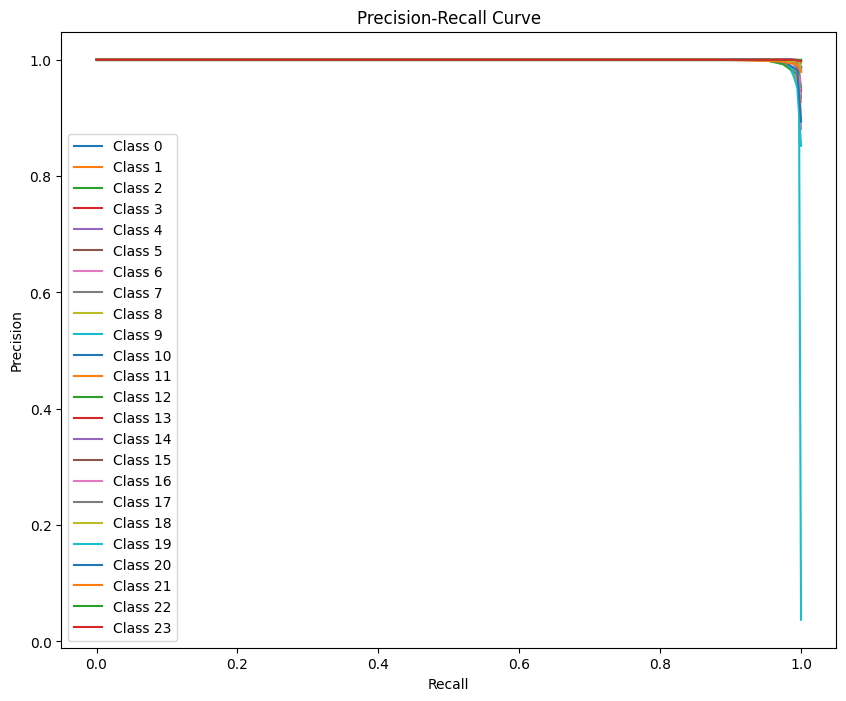

Text(0, 0.5, 'Accuracy')

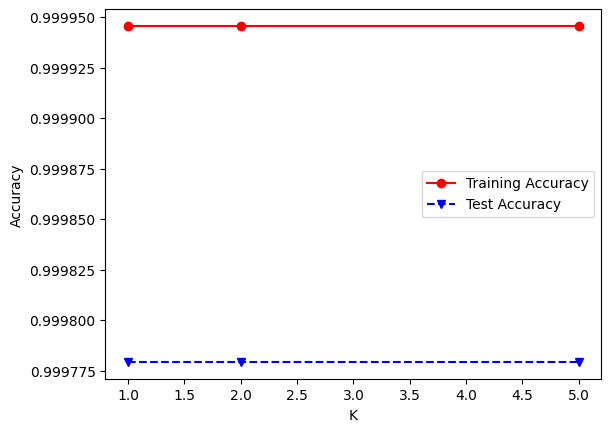

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create the SVM classifier
SVM = SVC()

# Fit the 
SVM.fit(X_train_scaled,y_train)

# Prediction
y_pred = SVM.predict(X_test_scaled)

# Decision scores
y_scores = SVM.decision_function(X_test_scaled)

print("Mean accuracy:", SVM.score(X_test_scaled, y_test))

# Evaluate the result
print(f"SVM F1 score:{100*accuracy_score(y_test, y_pred)}")

# plot roc curves
plt.figure(figsize=(10, 8))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(), y_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Print ROC AUC values for each class
for i in range(len(np.unique(y_test))):
    print(f"Class {i} ROC AUC: {roc_auc[i]}")

# Print micro-average ROC AUC
print(f"Micro-average ROC AUC: {roc_auc_micro}")

# plot precision/recall curve
plt.figure(figsize=(10, 8))
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Hyperparameters
hyperparameters = [1, 2, 5]

trainAcc = np.zeros(len(hyperparameters))
testAcc = np.zeros(len(hyperparameters))

# Plotting
for index, k in enumerate(hyperparameters):
    SVM = SVC()
    SVM = SVM.fit(X_train_scaled, y_train)
    y_predTrain = SVM.predict(X_train_scaled)
    y_predTest = SVM.predict(X_test_scaled)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)

plt.plot(hyperparameters, trainAcc,'ro-', hyperparameters, testAcc, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('K')
plt.ylabel('Accuracy')

#Accuracy stays virtually the same even though hyperparameters change


Using MLP Classifier (Ex. 6) MLP stands for Multilayer-layer Perceptron. It is a type of neural-network consisting in multiple layers made up of multiple neurons. Each connection between neurons has a weight and a particular function is used to change this value which is used a criterion for the network to map input data to the output.

Predicted classes: [ 8  4 18 ... 17 17  7]
Mean accuracy: 1.0
MLP F1 score: 1.0


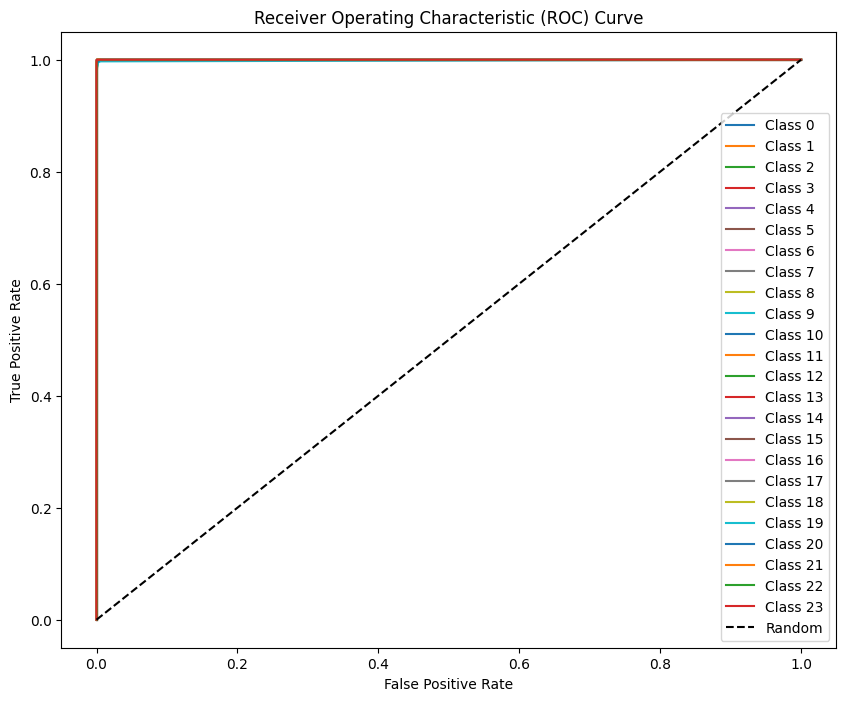

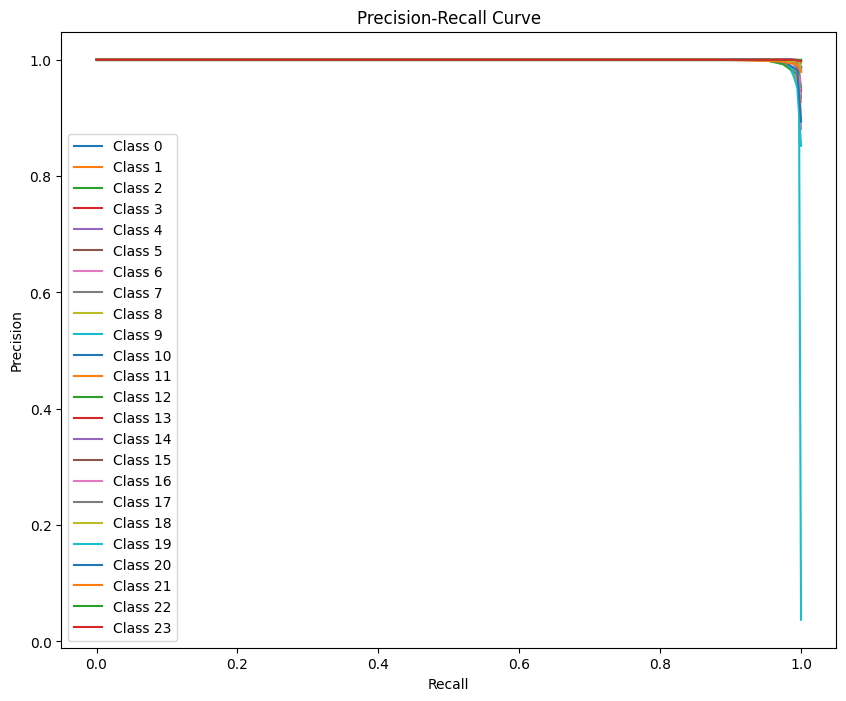

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, precision_recall_curve
import numpy as np

#second split because we stratify on y. This also improves model's perfomance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
MLP = MLPClassifier(random_state=1, max_iter=500).fit(X_train_scaled, y_train)

#prints the label for the predicted classes
y_pred = np.array(MLP.predict(X_test_scaled))
print("Predicted classes:" , y_pred)

#returns the mean accuracy for this classifier
print("Mean accuracy:", MLP.score(X_test_scaled, y_test))

#Weighted F1 score for the MLP model
f1_clf = f1_score(y_test, y_pred, average='weighted')
print("MLP F1 score:", f1_clf)

# plot roc curves
plt.figure(figsize=(10, 8))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# plot precision/recall curve
plt.figure(figsize=(10, 8))
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Compute the F1 score of each classifier

F1 measure: 0.16207726117936494


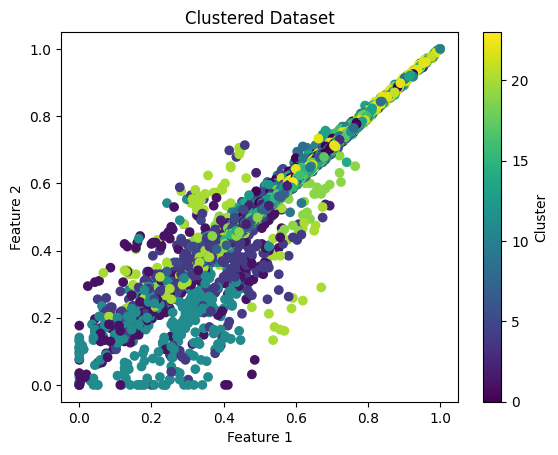

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

In [9]:
from sklearn.cluster import KMeans

k= 24
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)
y_assigned = np.zeros_like(cluster_labels)
for cluster in range(k):
    mask = (cluster_labels == cluster)
    assigned_class = np.bincount(y_train[mask]).argmax() #should execute majority voting
                                                         # on the labels but does not work properly
                                                         #should equal method seen in class (argmax(SIGMA wi * I[v = yi]))
    y_assigned[mask] = assigned_class

f1 = f1_score(y_train, y_assigned, average='weighted')
print("F1 measure:", f1)

plt.scatter(X_train_scaled[:, 1], X_train_scaled[:, 2], c=cluster_labels, cmap='viridis')
plt.title('Clustered Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

distortions = []
k_values = range(1, 25)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(k_values, distortions, 'bo-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

